In [2]:
import numpy as np
from src.PorfolioOptimizerSA import PortfolioOptimizerSA
from src.analysis import (
    plot_temperature_history,
    plot_cvar_history,
    return_rate_influence,
    plot_return_rate_influence,
    plot_weights,
    analyze_different_portfolios,
    plot_regulariztation_weights
)

In [3]:
# stany
S_T = np.array(
    [
        [100, 105, 110, 95, 90],
        [100, 100, 100, 100, 100],
        [110, 108, 112, 95, 85],
        [95, 90, 100, 105, 95],
        [80, 85, 90, 100, 95],
    ]
)

# prawdopodobieństwa
probabilities = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

# poziom ufności
alpha = 0.95

# stan początkowy
S_0 = np.array([100, 100, 100, 100, 100])

# wartość portfela na początku
V_0 = 10000

# stopa zwrotu
return_rate = 0.05

# parametry symulowanego wyżarzania
T_0 = 1000  # początkowa temperatura
T_f = 0.01  # temperatura końcowa
max_iter = 1000  # maksymalna liczba iteracji
step_size = 0.1  # wielkość kroku
annealing_rate = 0.99  # współczynnik chłodzenia

optimizer = PortfolioOptimizerSA(
    T_0=T_0,
    T_f=T_f,
    max_iter=max_iter,
    step_size=step_size,
    annealing_rate=annealing_rate,
    probabilities=probabilities,
    alpha=alpha,
    S_0=S_0,
    S_T=S_T,
    V_0=V_0,
    return_rate=return_rate
)
optimizer.optimize()

optimal_portfolio = optimizer.x
optimal_CVaR = optimizer.calculate_CVaR(optimal_portfolio)

print("Optymalny portfel:", optimal_portfolio)
print("Wartość CVaR:", optimal_CVaR)

Optymalny portfel: [-1.2300728e+03  1.3281210e+03  7.3303187e-01  6.7403632e-01
  5.4476267e-01]
Wartość CVaR: 7130.199579000473


#### Harmonogram chłodzenia

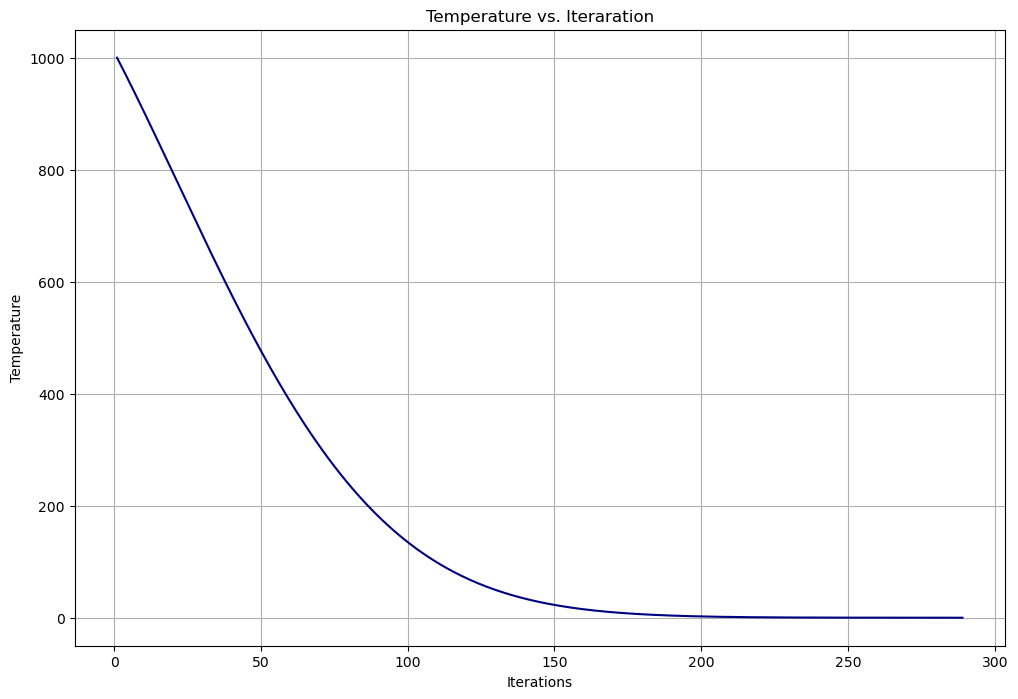

In [3]:
plot_temperature_history(optimizer)

#### Proces optymalizacji

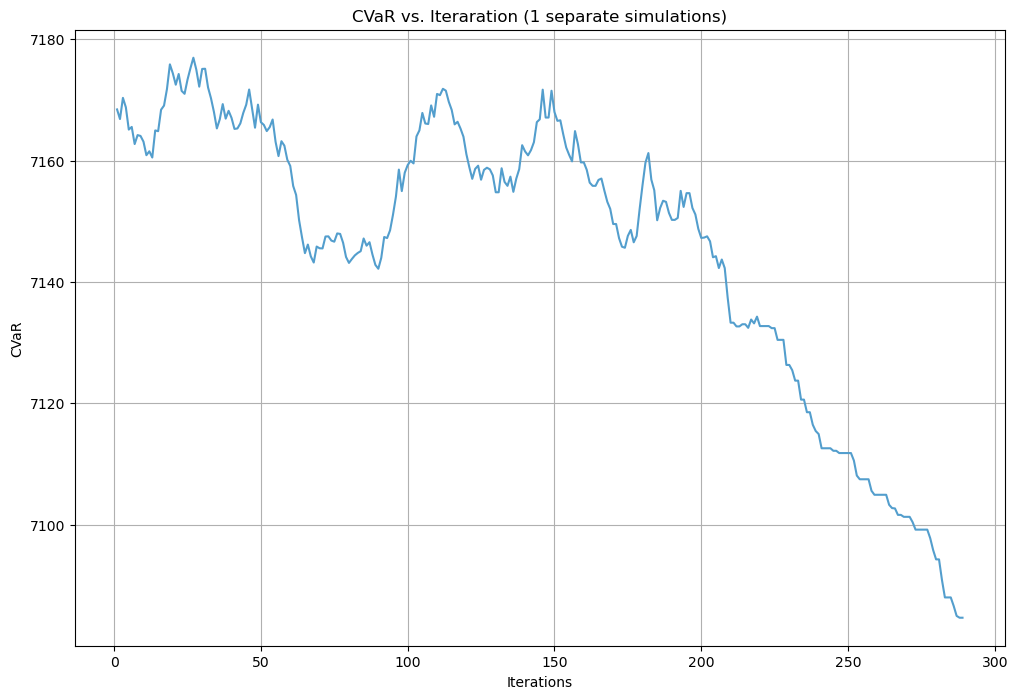

In [7]:
plot_cvar_history(T_0 = T_0,
                  T_f = T_f,
                  max_iter = max_iter,
                  step_size = step_size,
                  annealing_rate = annealing_rate,
                  probabilities = probabilities,
                  alpha = alpha,
                  S_0 = S_0,
                  S_T = S_T,
                  V_0 = V_0,
                  return_rate = return_rate)


#### Różne ścieżki optymalizacji 

Ponieważ optymalizacja jest niedeterministyczna, dla różnych ziaren generatora liczb pseudolosowych możemy otrzymać różne ścieżki optymalizacji, a ty samym różne wartości końcowe.

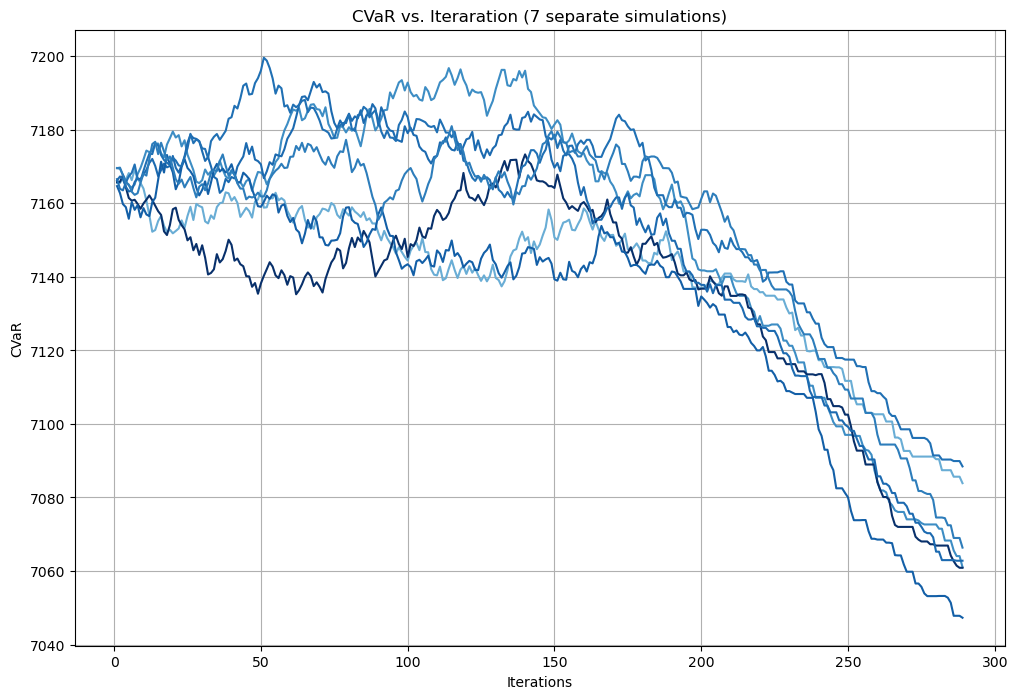

In [ ]:
plot_cvar_history(T_0 = T_0,
                  T_f = T_f,
                  max_iter = max_iter,
                  step_size = step_size,
                  annealing_rate = annealing_rate,
                  probabilities = probabilities,
                  alpha = alpha,
                  S_0 = S_0,
                  S_T = S_T,
                  V_0 = V_0,
                  return_rate = return_rate,
                  n_paths = 7)

#### Wpływ stopy zwrotu 

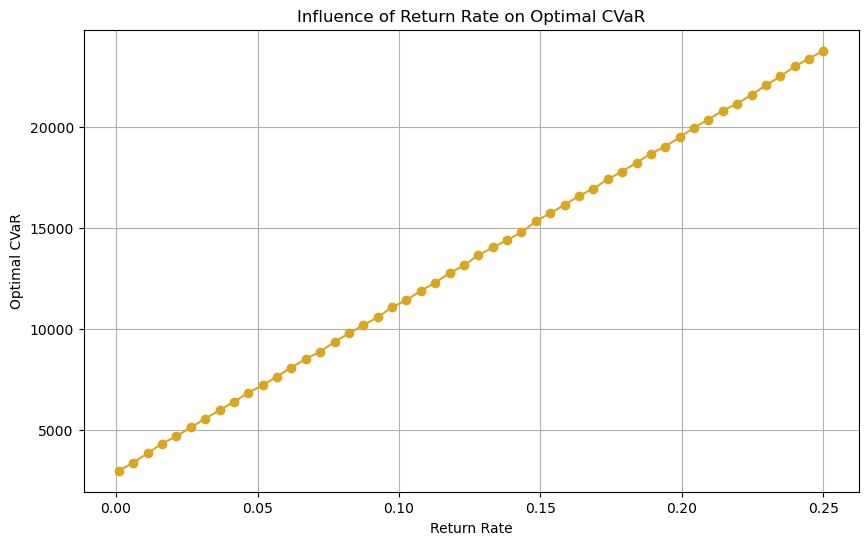

In [12]:
res = return_rate_influence(T_0=T_0,
                            T_f=T_f,
                            max_iter=max_iter,
                            step_size=step_size,
                            annealing_rate=annealing_rate,
                            probabilities=probabilities,
                            alpha=alpha,
                            S_0=S_0,
                            S_T=S_T,
                            V_0=V_0,
                            return_rates=np.linspace(0.001, 0.25, 50))
plot_return_rate_influence(res)

Widać zależność liniową.

#### Zmiana ilości akcji w portfelu w procesie optymalizacji

Uwaga. Tutaj dodajemy portfel początkowy - wynikający z wiedzy eksperckiej inwestora.

In [4]:
optimizer = PortfolioOptimizerSA(
    T_0=T_0,
    T_f=T_f,
    max_iter=max_iter,
    step_size=step_size,
    annealing_rate=annealing_rate,
    probabilities=probabilities,
    alpha=alpha,
    S_0=S_0,
    S_T=S_T,
    V_0=V_0,
    return_rate=return_rate, 
    initial_portfolio=np.array([10, 20, 30, 40, 50])
)
optimizer.optimize()

optimal_portfolio = optimizer.x
optimal_CVaR = optimizer.calculate_CVaR(optimal_portfolio)

print("Optymalny portfel:", optimal_portfolio)
print("Wartość CVaR:", optimal_CVaR)

plot_weights(optimizer, './visualizations/weights.gif', plot_every_k_iterations=5, fps=20)

/Users/gasparsekula/Uni/sem6/MeanVariancePortfolioMC/src/PorfolioOptimizerSA.py:152: RuntimeWarning: overflow encountered in exp
  p_accept = min(1, np.exp(-delta_CVaR / T))


Optymalny portfel: [-1067  1133    17    16     1]
Wartość CVaR: 5920.0


#### Wpływ wyboru początkowego portfela

In [6]:
analyze_different_portfolios(
    T_0=T_0,
    T_f=T_f,
    max_iter=max_iter,
    step_size=step_size,
    annealing_rate=annealing_rate,
    probabilities=probabilities,
    alpha=alpha,
    S_0=S_0,
    S_T=S_T,
    V_0=V_0,
    return_rate=return_rate,
    initial_portfolios=[np.array([10, 20, 30, 40, 50]), np.array([5, 15, 25, 35, 45]), np.array([20, 30, 40, 50, 60]),
                        np.array([0, 0, 0, 0, 100]), np.array([100, 100, 100, 100, 100]), np.array([1000, 1000, 1000, 1000, 1000])],
)

No  initial portfolio                                  optimal portfolio                                  cvar      
1   [10 20 30 40 50]                                   [-1124  1190    14    15     5]                    6230.0000
2   [ 5 15 25 35 45]                                   [-1101  1171    11    19     0]                    6110.0000
3   [20 30 40 50 60]                                   [-1032  1076    23    27     6]                    5495.0000
4   [  0   0   0   0 100]                              [-1593  1646     0     0    47]                    8730.0000
5   [100 100 100 100 100]                              [-812  701   81   77   53]                         2830.0000
6   [1000 1000 1000 1000 1000]                         [ 1508 -4291   975   957   951]                    26598.0000


#### Regularyzacja?
Łatwo zauważyć, że akcje 1 i 2 mają wysokie wagi.

 Badamy wpływ regularyzacji L2 w procesie optymalizacji na postać portfela.

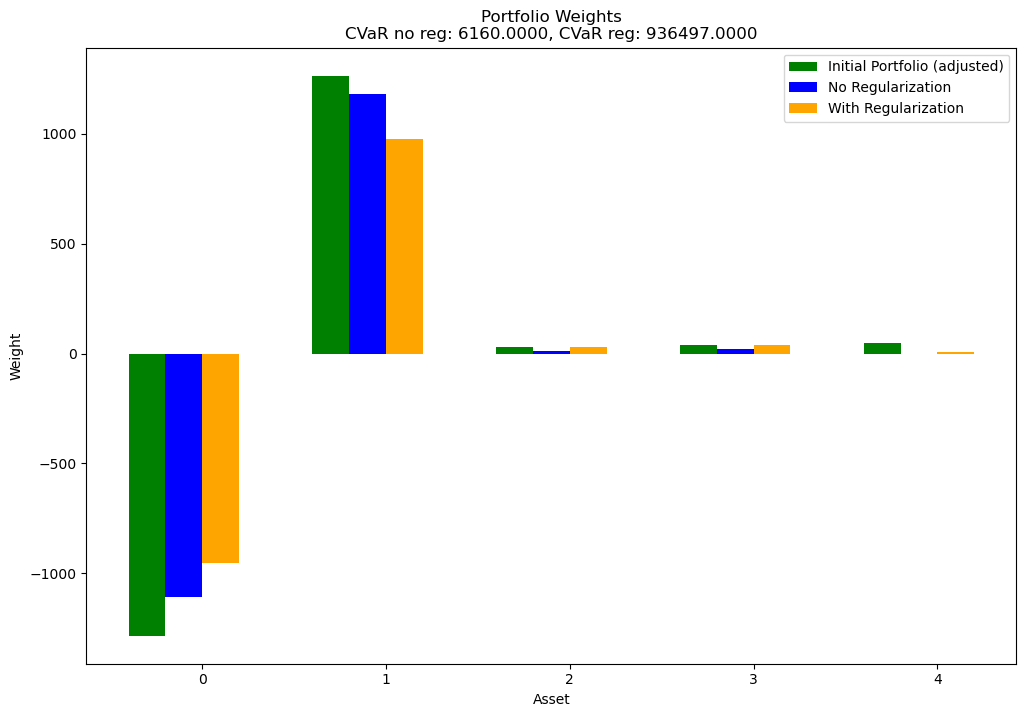

CVaR with regularization (lambda=0.5): 936497.00
CVaR without regularization: 6160.00


In [7]:
plot_regulariztation_weights(T_0=T_0,
                             T_f=T_f,
                            max_iter=max_iter,
                            step_size=step_size,
                            annealing_rate=annealing_rate,
                            probabilities=probabilities,
                            alpha=alpha,
                            S_0=S_0,
                            S_T=S_T,
                            V_0=V_0,
                            return_rate=return_rate,
                            regularization_lambda=0.5,
                            initial_portfolio=np.array([10, 20, 30, 40, 50]),)